# Nearest Neighbours

In the first chapters we were using linear regression which is a supervised regression technique. We're going to carry on with supervised techniques but look instead at how we can classify or categorise data using an algorithm called *K-nearest neighbours*.

When you ask for a prediction from k-NN for a data point $x$, the algorithm looks at all the training data that was passed in and finds the $k$ nearest (e.g. the 5 nearest) data points. The label of $x$ will then be based on whichever label was found most frequently within the $k$ neighbours.

<img src="knn.gif" style="box-shadow: none;">

We'll start by grabbing some data which represents a interesting case for some classification methods. Start by loading the data file:

In [1]:
import pandas as pd

data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/moons.csv")

If we look at the first few rows of this data, we can see it has two features (`x1` and `x2`) and one target column (`y`). The target column is an integer, which suggests it will work well with a classification algorithm:

In [2]:
data.head()

x1        x2  y
0  0.830858 -0.334342  1
1  0.991710  0.879000  0
2  1.107245 -0.470344  1
3 -0.140899  1.033148  0
4  0.405592  1.328529  0

Let's also have a look at the data visually to see what we're working with:

<Axes: xlabel='x1', ylabel='x2'>

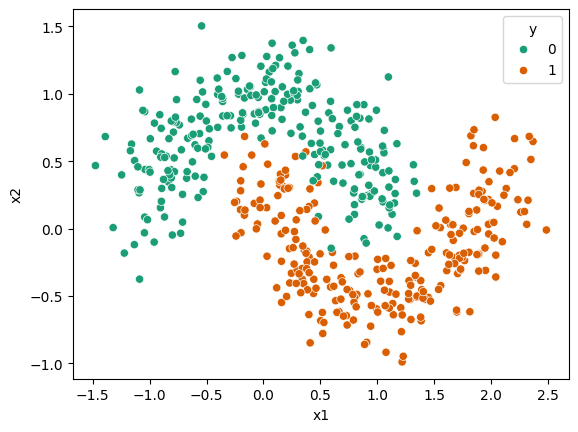

In [3]:
import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")

We can grab out the features and target parts now to use in scikit-learn shortly:

In [4]:
X = data[["x1", "x2"]]
y = data["y"]

As ever, we need to split our data into a training data set and a test data set:

In [5]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)

Now we have our data and it's all in the correct format ($X$ is a 2D table of data and $y$ is a single column of labels), we can go ahead and use our model.

As usual it works by importing the model, [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), making an instance of it (setting the hyperparameters) and then fitting it by passing it $X$ and $y$ for the training data set.

The most important hyperparameter for k-NN is $k$, or the number of neighbours. The model defaults to 5 but you can set it to any integer you wish.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier()

At this point, our `model` is ready to use. I'll point out one important difference between k-NN and other algorithms and that is how it stores the information you have given it.

Thinking back to the example of the linear regression from the first chapter, in that case we gave the model some data (50 $x$,$y$ values) and based on those it calculated two parameters of interest, the gradient and the y-intercept. No matter how many training examples we give it, it will always generalise those data down to two parameters.

K-nearest neighbours is different in that it is a *non-generalising learning algorithm* (also referred to as *instance-based learning*). It doesn't simplify down the training data we pass in, it actually stores *all* of it internally. Thinking about it, this makes sense as when we ask it to make a prediction it needs to actually go and find the data points that are near the prediction site. This means that if we train a model on more data, the model becomes more heavyweight (i.e. may use more memory) and will likely become slower (as it needs to check more points to find the neighbours).

In general, this will not cause a problem but it's something that you should be aware of.

We can use our model in the same way as in the past to, for example, check the performance against the test data set:

In [7]:
model.score(test_X, test_y)

0.984

That looks like a very good score indeed. Is that believable or do you think we've done something wrong?

Let's take a look at the distribution of predictions compared to the input data.

We'll use a built-in function from scikit-learn called `DecisionBoundaryDisplay.from_estimator` to plot the predictions of the model, compared to the input data.:

<Axes: xlabel='x1', ylabel='x2'>

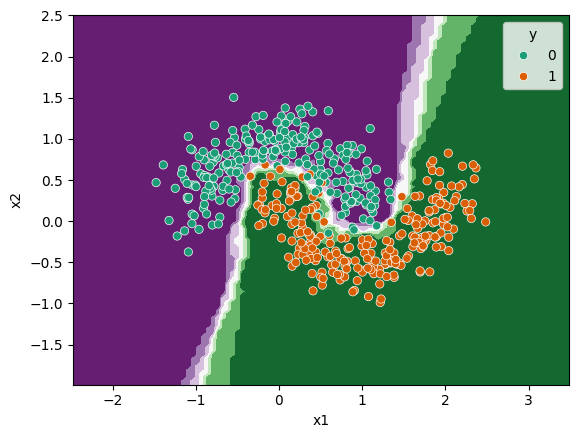

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(model, X, cmap="PRGn")
sns.scatterplot(data=X, x="x1", y="x2", hue=y, palette="Dark2")

Here we can see that all of the green points are sitting in the one background area and the orange points are all in their area. In this case, it makes sense that it's got a very good score since the data are not overlapping much.

### Exercise

Run the code above and make sure you see the same output.

Experiment with different values of `n_neighbors` when creating the model (between 1 and 200).

How does varying this value affect the prediction map or the model score?

[<small>answer</small>](answer_knn_moons.ipynb)